# **Wheat Production and Global Pricing Dynamics**

**Authors**: Matthew Ocampo, Sam Sims, Judith Haryanto, Sant Sumetpong

## **Introduction**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import linear_model

/Users/sant/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Changes in food prices depend on changes in input costs that goes into food production. As such, should there be changes in input costs, we would expect to see changes in food prices. The research question we’re interested in is the temporal relationship between changes in input costs with changes in food prices with time progression, and ultimately which inputs are predicted to be the greatest contributors towards changes in wheat prices.

We will be investigating the relationship between the price of different inputs and other non-goods external factors (i.e., precipitation) that may influence wheat production. Such priced inputs are fertilizers, pesticides, oil, agricultural machinery, farm labour, and seed prices. Correlations between various inputs were investigated before building regression models that provide stronger predictions while keeping low mean absolute errors between predicted wheat prices and actual wheat prices in our testing model.

The findings could contribute towards greater understanding of how food prices fluctuate based on input prices, specifically how much and when do changes in these prices affect food prices. This will be useful in informing macroeconomic policies and international relations since not only is wheat one of the global commodities of the world –  but also the price increase in these inputs (e.g., oil and fertilizer) can potentially pose inflationary pressure to any national economy that engages in international trade.

We use US wheat prices as a reflection of global wheat prices. We assume the global wheat market is a perfectly competitive market, where countries take a set price.

## **Hypothesis**

We expect oil prices to be a major determinant of wheat pricing dynamics, as oil is heavily related to other factors in the production chain of wheat. For instance, agricultural machinery runs on oil, which is ultimately used in wheat harvesting. Fertilizer should also be a major factor, as it is necessary for improving soil conditions and nutrients. We expect fertilizer prices to heavily influence wheat prices as well. Lastly, we expect precipitation to heavily influence wheat production, which should impact prices. We predict a high correlation between precipitation amounts and wheat production amounts.

## **Methodology**

We decided to use US data for our analyses because not only are there a lot of datasets being publicly available, but also because the US is one of the largest global producers and exporters of wheat. Our analysis is restricted to monthly data from January 1990 to February 2024, just after massive technological changes and large-scale farming became increasingly adopted starting from the 1970s. Monthly wheat prices, oil prices (West Texas Intermediary pricing), seed prices, machinery prices, are obtained from the US Federal Reserve Economic Data (FRED). Climate data (i.e., monthly precipitation) were obtained from the National Oceanic and Atmospheric Administration (NOAA). Information on US minimum wage and wages of farm laborers were obtained from the US Department of Agriculture (USDA) and the US Bureau of Labour Statistics. Data on yearly wheat production in millions of bushels were obtained from USDA.

We then plotted numerous variables alongside one another to visualize how the movements of one variable changes relative to another - supplementing these graphs with correlation coefficients to see how each pair of variables are closely correlated to one another.

Finally, we will regress the input factors as our controlled variables versus wheat prices as the outcome variable to form a time-series regression model. Using a machine learning model and splitting up our data into train-test periods, we tested the predictive strength of our models (regression tree and lasso regression) by looking at which model minimizes the mean squared errors.

## **The Data**

- PCU325311325311-4.csv is Producer Price Index by Industry: Nitrogenous Fertilizer Manufacturing: Urea (DISCONTINUED)

- WTISPLC is the price of oil by West Texas Intermediary

- WPUSI024011 is the Producer Price Index by Commodity: Special Indexes: Agricultural Machinery, Including Tractors

- PWHEAMTUSDM is the Global price of Wheat

- farm_wage_data_99t22 is the farm wage data from USDA.

- Pesticide2003 is pesticade data from 2003.

- PCU3253203253201 is pesticide data from Producer Price Index by Industry: Pesticide and Other Agricultural Chemical Manufacturing: Agricultural and Commercial Pesticides and Chemicals FRED.

- Seeds is seed prices from USDA.

- Weather data from NOAA.

- Wheat production.

## **Analysis**

We begin with a pie chart depicting resource use in the production of wheat.

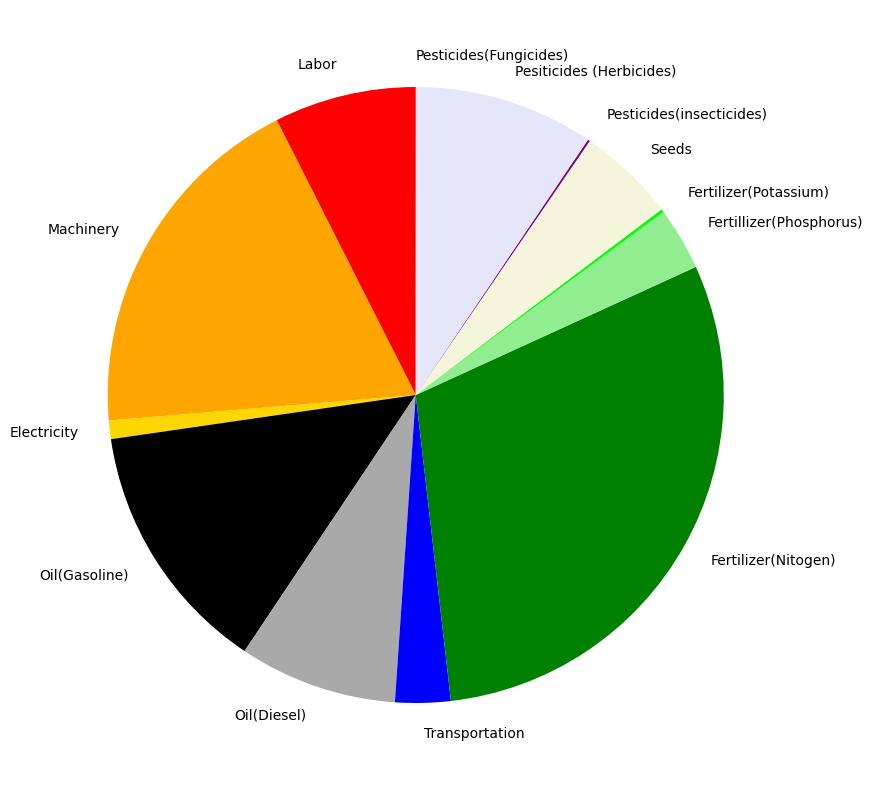

In [2]:
plt.rcParams["figure.figsize"] = [25, 10]

y = np.array([316000, 800000, 41000, 565000, 352000, 123000, 1272000, 140000, 7000, 218000, 5000, 400000, 400, ])
mylabels = ['Labor', 'Machinery', 'Electricity','Oil(Gasoline)', 'Oil(Diesel)','Transportation', 'Fertilizer(Nitogen)', 'Fertillizer(Phosphorus)','Fertilizer(Potassium)','Seeds','Pesticides(insecticides)', 'Pesiticides (Herbicides)','Pesticides(Fungicides)']
mycolors = ["red", "orange", 'gold', 'black','darkgrey','blue','green','lightgreen','lime','beige','purple','lavender', 'brown' ]

plt.pie(y, labels = mylabels, startangle = 90, colors=mycolors)
plt.show() 

The data from the pie chart comes from Amenumey, S.E., Capel, P.D. Fertilizer Consumption and Energy Input for 16 Crops in the United States.Nat Resour Res 23, 299–309 (2014) who referenced Pimentel, D. (2006). Impacts of organic farming on the efficiency of energy use in agriculture. Washington, DC: The Organic Center 40 p. 

The input chart represents the importance of each input into the production of wheat. It is unsurprising that the three largest inputs into wheat production, making up 73.8% of the total, include Fertilizers (33.3%), Oil (21.6%) and Machinery (18.9%). 

This influence our decision to not correlate our wheat data with inputs like electricity, labour and transportation and focus more heavily on inputs that had larger and more globally orientated data sets.

## **Visualizations**

We continue by creating visualizations that deomstrate relationships between input prices and wheat prices. We consider the following inputs and their prices: oil, fertilizer, agricultural machinery, pesticides and seeds for planting. We hoped these line plots would serve as early indicators of which input prices were highly correlated with wheat prices. We examine US prices for all inputs, with oil data being taken from the West Texas Intermediary. 

In [3]:
df1 = pd.read_csv('WTISPLC.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df1 = pd.merge(df1, df2)

merged_df1['DATE'] = pd.to_datetime(merged_df1['DATE'])
merged_df1 = merged_df1.set_index('DATE')

merged_df1.rename(columns={'WTISPLC': 'WTI', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df1.head()

,WTI,WHEAT (USD)
DATE,,
1990-01-01,22.641,167.918579
1990-02-01,22.108,160.937271
1990-03-01,20.418,156.528030
1990-04-01,18.582,159.467529
1990-05-01,18.237,149.179291


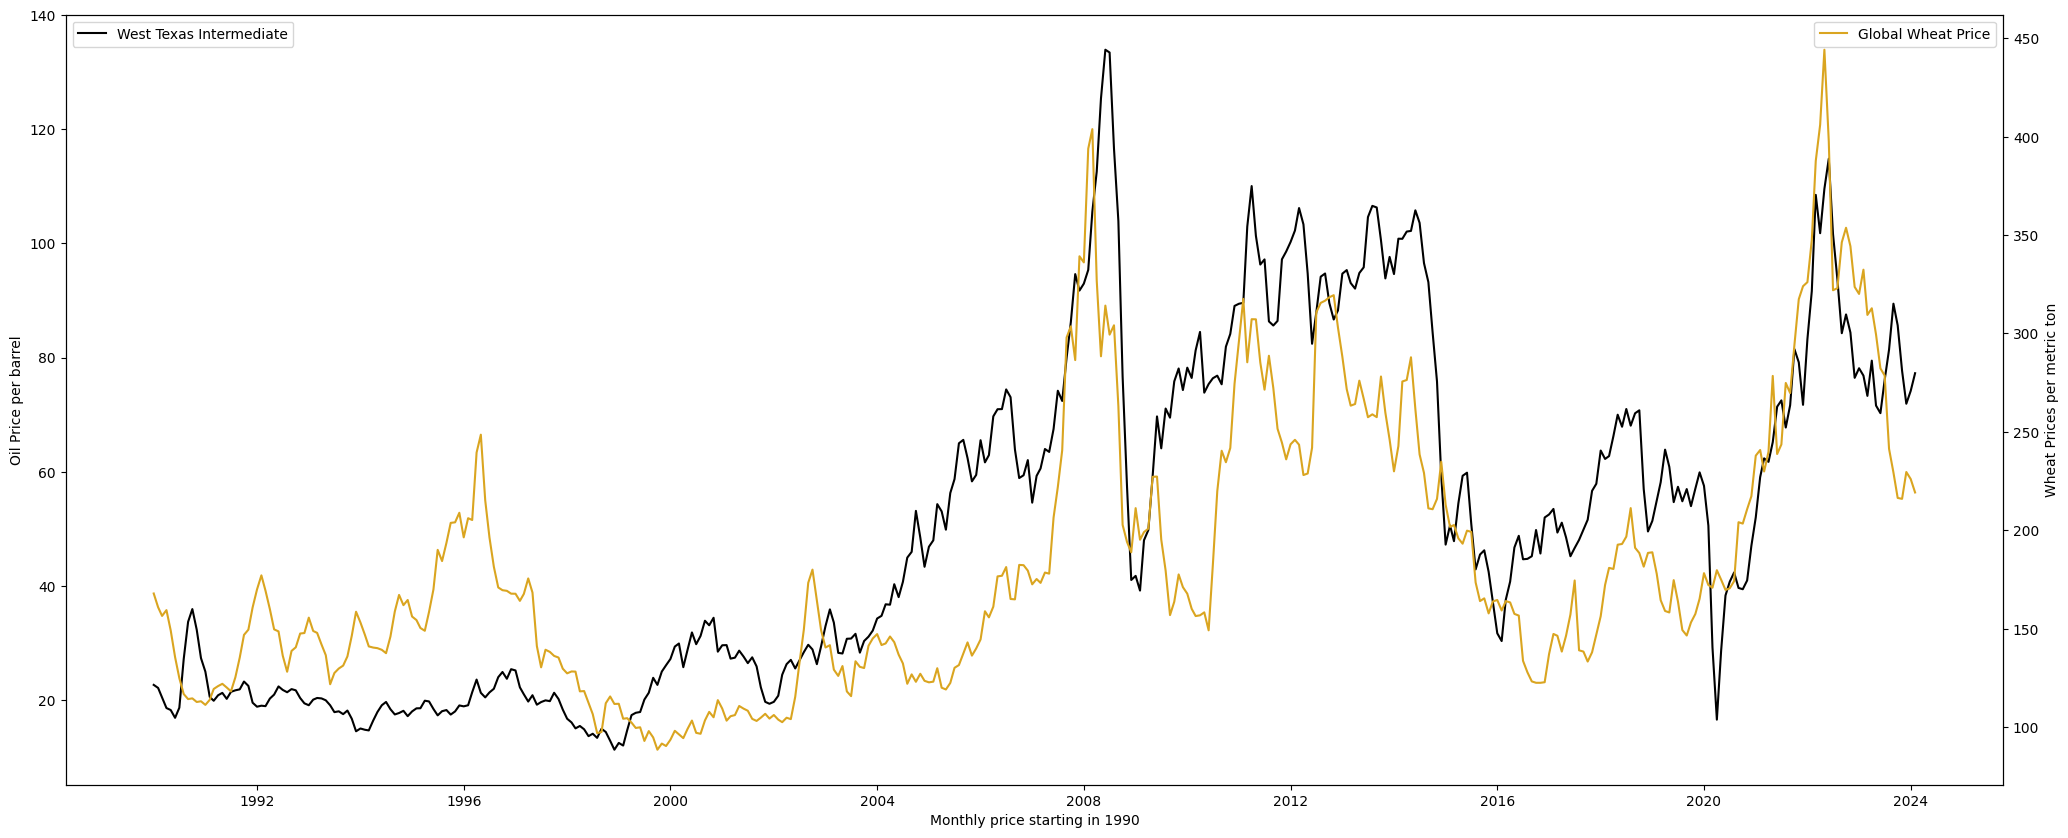

In [4]:
x = merged_df1.index
y1 = merged_df1['WTI']
y2 = merged_df1['WHEAT (USD)']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='black', label='West Texas Intermediate')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Oil Price per barrel', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = '#DAA520', label='Global Wheat Price')  # the data was collected by the International Montetary Fund
ax2.set_ylabel('Wheat Prices per metric ton', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [5]:
df1 = pd.read_csv('PCU325311325311.csv')
df2 = pd.read_csv('WTISPLC.csv')

merged_df2 = pd.merge(df1, df2)

merged_df2['DATE'] = pd.to_datetime(merged_df2['DATE'])
merged_df2 = merged_df2.set_index('DATE')

merged_df2.rename(columns={'PCU325311325311': 'FERT', 'WTISPLC': 'WTI'}, inplace=True)
merged_df2.head()

,FERT,WTI
DATE,,
1990-01-01,114.4,22.641
1990-02-01,120.1,22.108
1990-03-01,119.6,20.418
1990-04-01,119.1,18.582
1990-05-01,115.8,18.237


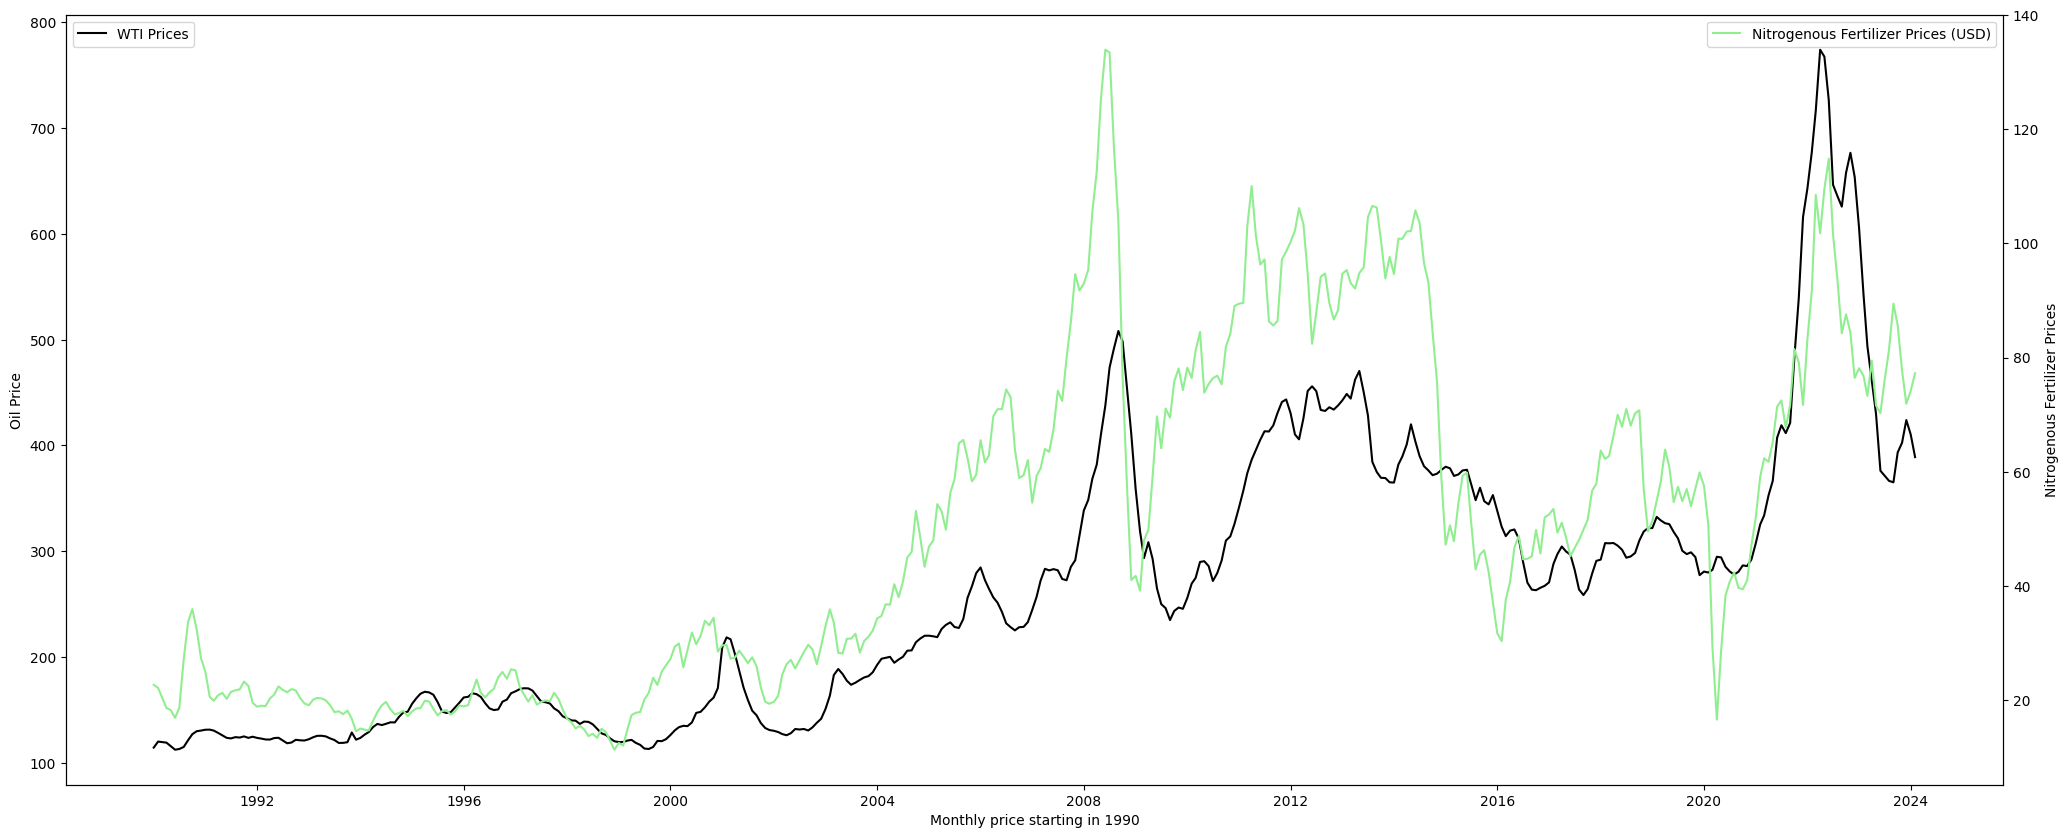

In [6]:
x = merged_df2.index
y1 = merged_df2['FERT']
y2 = merged_df2['WTI']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='black', label='WTI Prices')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Oil Price', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = 'lightgreen', label='Nitrogenous Fertilizer Prices (USD)') 
ax2.set_ylabel('Nitrogenous Fertilizer Prices', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [7]:
df1 = pd.read_csv('WPUSI024011.csv')
df2 = pd.read_csv('WTISPLC.csv')

merged_df3 = pd.merge(df1, df2)

merged_df3['DATE'] = pd.to_datetime(merged_df3['DATE'])
merged_df3 = merged_df3.set_index('DATE')

merged_df3.rename(columns={'WPUSI024011': 'AGRI MACH', 'WTISPLC': 'WTI'}, inplace=True)
merged_df3.head()

,AGRI MACH,WTI
DATE,,
1990-01-01,122.3,22.641
1990-02-01,122.4,22.108
1990-03-01,122.8,20.418
1990-04-01,123.2,18.582
1990-05-01,123.2,18.237


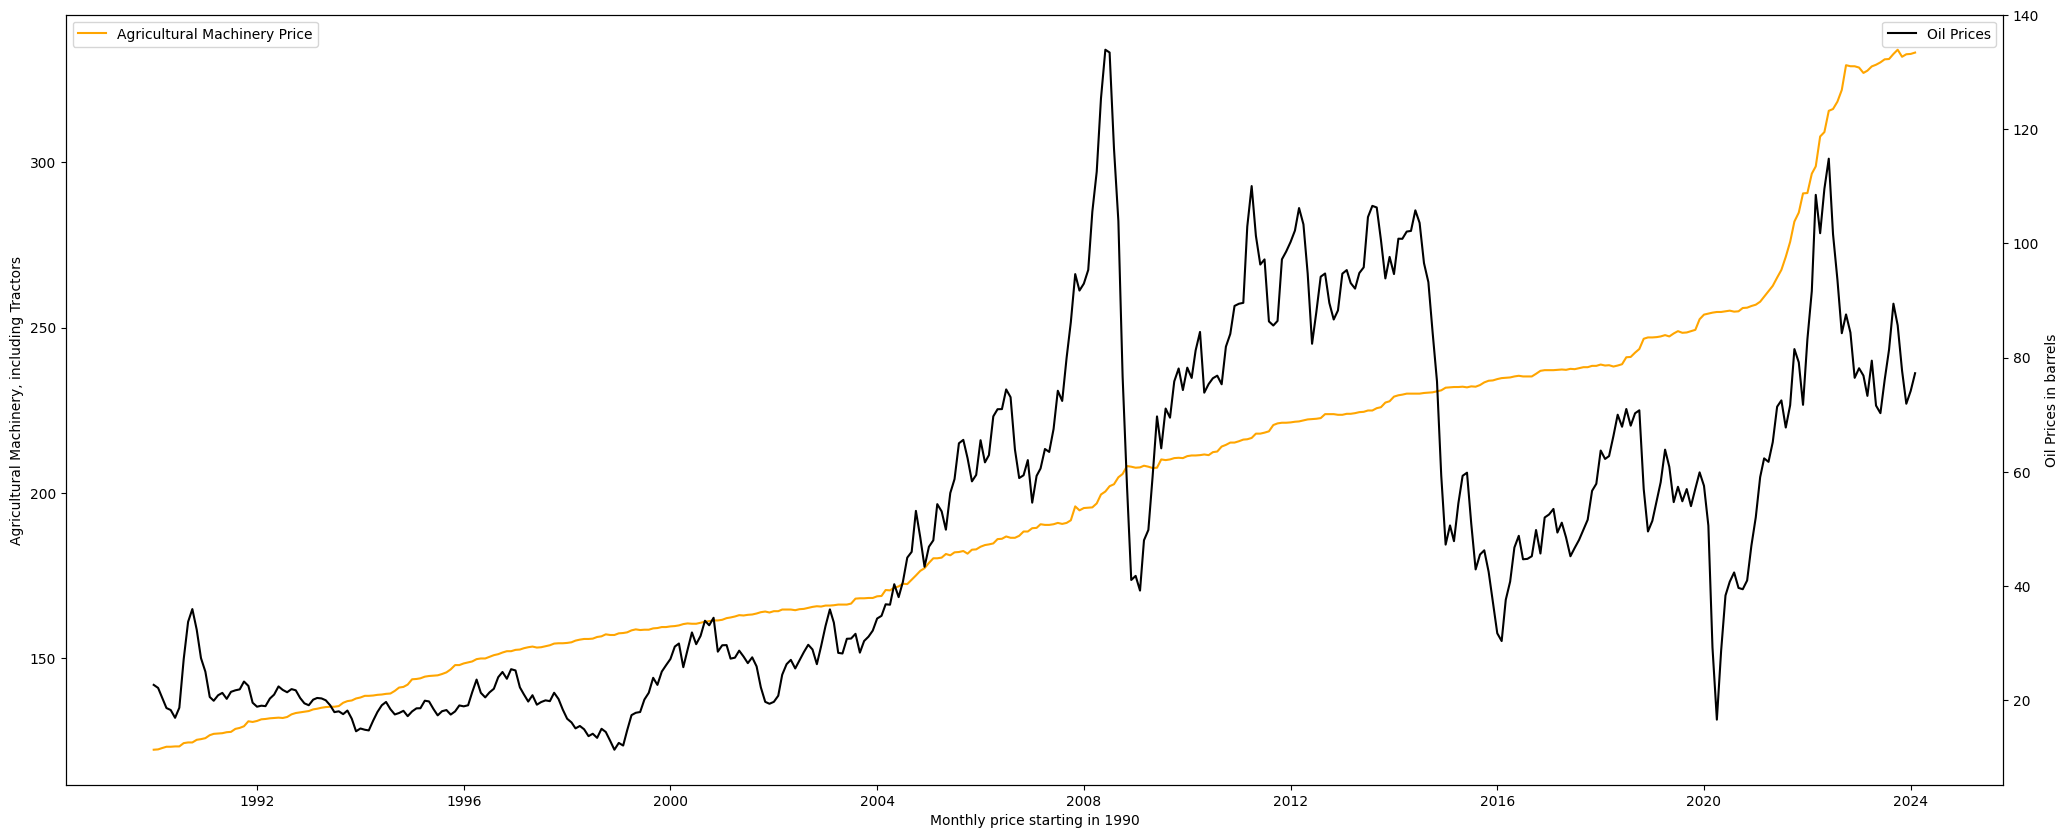

In [8]:
x = merged_df3.index
y1 = merged_df3['AGRI MACH']
y2 = merged_df3['WTI']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='orange', label='Agricultural Machinery Price')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Agricultural Machinery, including Tractors', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = 'black', label='Oil Prices')  # the data was collected by the International Montetary Fund
ax2.set_ylabel('Oil Prices in barrels', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [9]:
df1 = pd.read_csv('PCU325311325311.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')
merged_df4 = pd.merge(df1, df2)

merged_df4['DATE'] = pd.to_datetime(merged_df4['DATE'])
merged_df4 = merged_df4.set_index('DATE')

merged_df4.rename(columns={'PCU325311325311': 'FERT', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df4.head()

,FERT,WHEAT (USD)
DATE,,
1990-01-01,114.4,167.918579
1990-02-01,120.1,160.937271
1990-03-01,119.6,156.528030
1990-04-01,119.1,159.467529
1990-05-01,115.8,149.179291


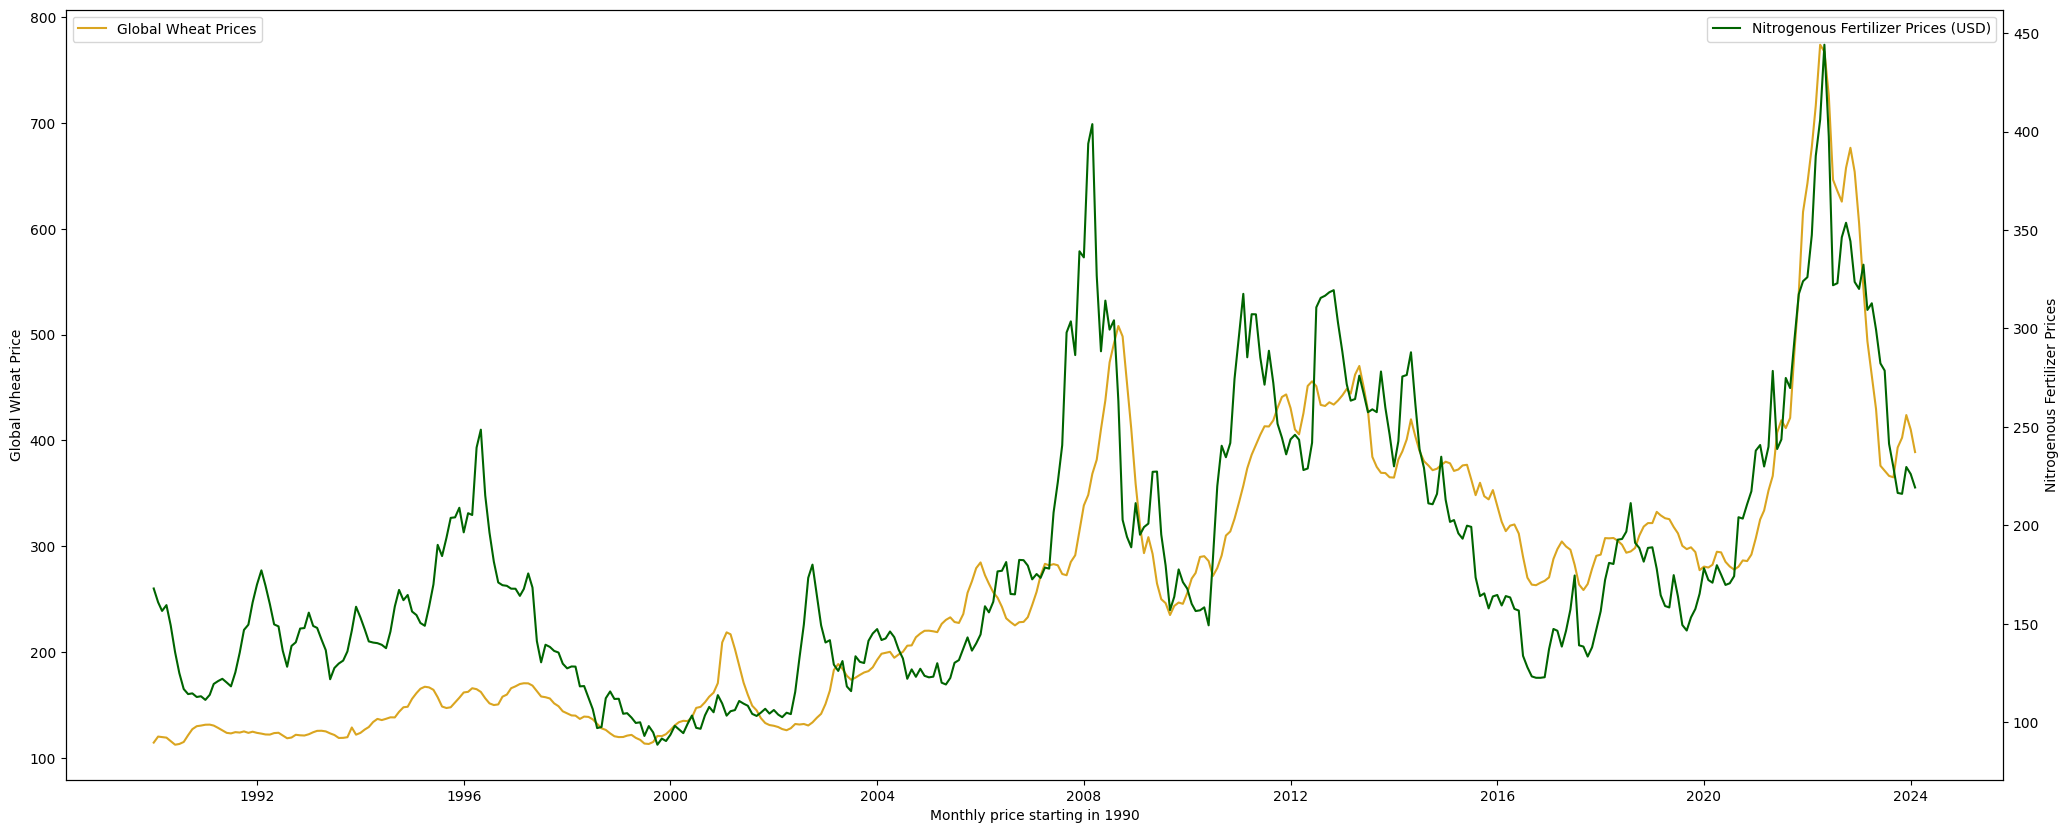

In [10]:
x = merged_df4.index
y1 = merged_df4['FERT']
y2 = merged_df4['WHEAT (USD)']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='#DAA520', label='Global Wheat Prices')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Global Wheat Price', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = 'darkgreen', label='Nitrogenous Fertilizer Prices (USD)') 
ax2.set_ylabel('Nitrogenous Fertilizer Prices', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [11]:
df1 = pd.read_csv('WPUSI024011.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df5 = pd.merge(df1, df2)

merged_df5['DATE'] = pd.to_datetime(merged_df5['DATE'])
merged_df5 = merged_df5.set_index('DATE')

merged_df5.rename(columns={'WPUSI024011': 'AGRI MACH', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df5.head()

,AGRI MACH,WHEAT (USD)
DATE,,
1990-01-01,122.3,167.918579
1990-02-01,122.4,160.937271
1990-03-01,122.8,156.528030
1990-04-01,123.2,159.467529
1990-05-01,123.2,149.179291


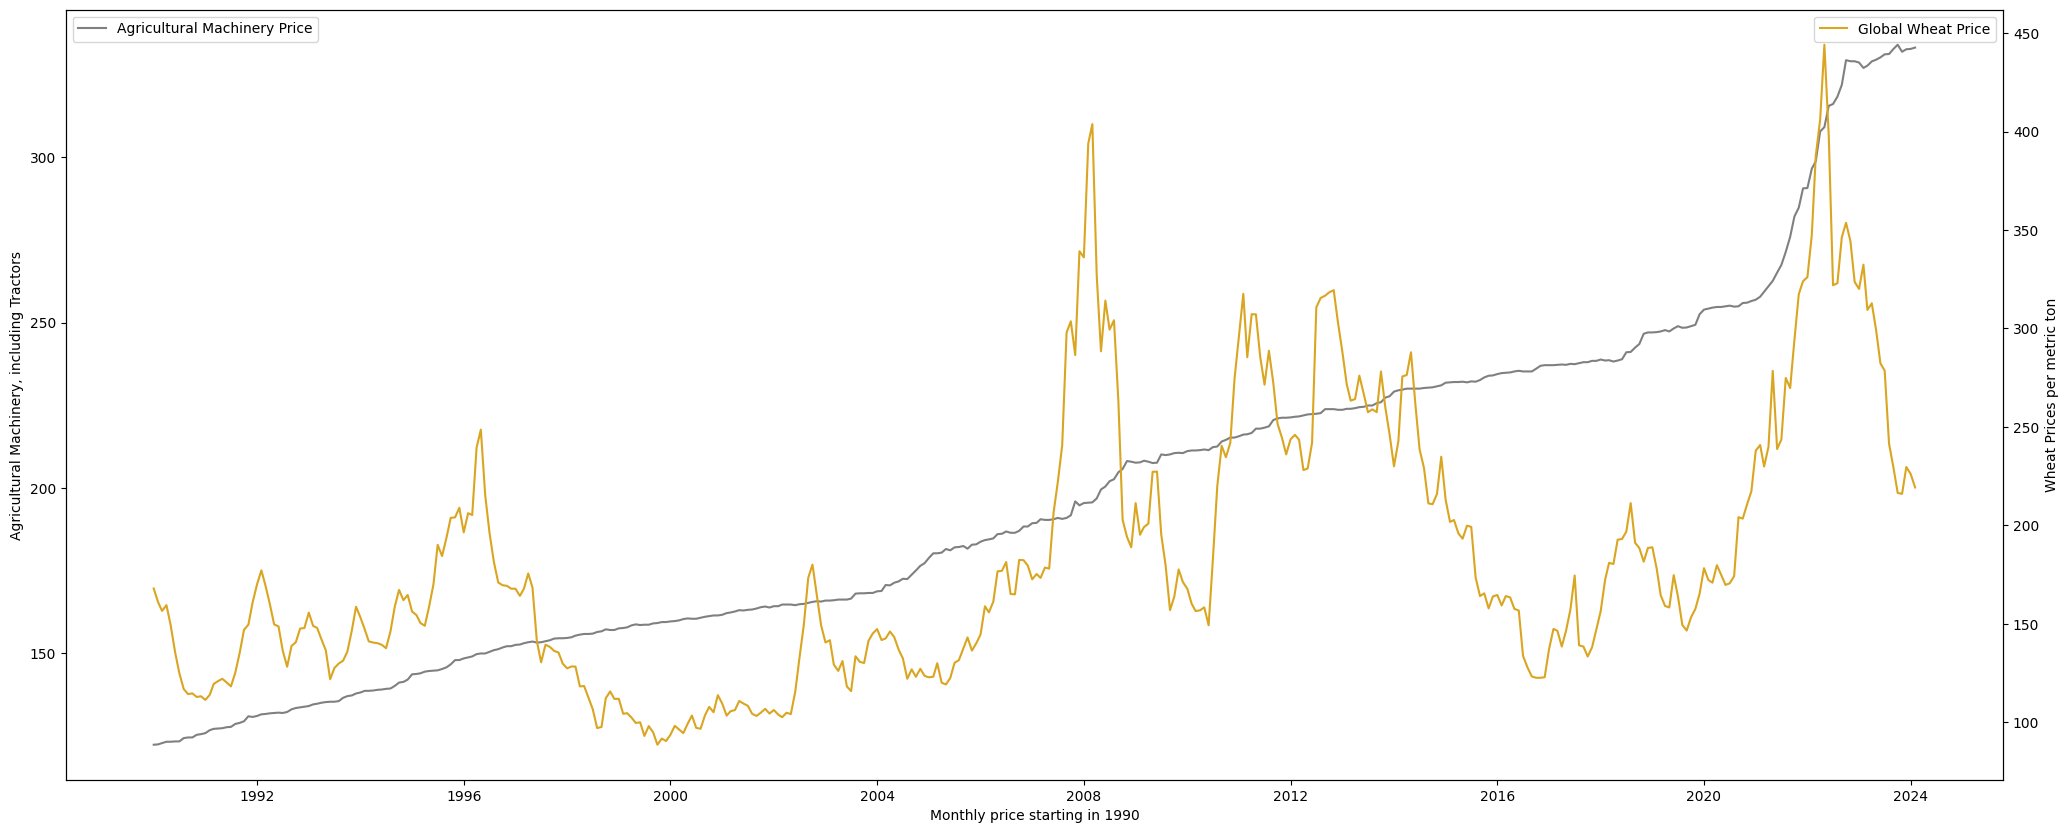

In [12]:
x = merged_df5.index
y1 = merged_df5['AGRI MACH']
y2 = merged_df5['WHEAT (USD)']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='Grey', label='Agricultural Machinery Price')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Agricultural Machinery, including Tractors', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = '#DAA520', label='Global Wheat Price')  # the data was collected by the International Montetary Fund
ax2.set_ylabel('Wheat Prices per metric ton', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [13]:
df1 = pd.read_csv('Pesticide2003.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df6 = pd.merge(df1, df2)

merged_df6['DATE'] = pd.to_datetime(merged_df6['DATE'])
merged_df6 = merged_df6.set_index('DATE')

merged_df6.rename(columns={'PCU3253203253201': 'PEST', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df6.head()

,PEST,WHEAT (USD)
DATE,,
2003-06-01,100.0,118.157134
2003-07-01,100.0,115.775953
2003-08-01,100.0,133.484492
2003-09-01,100.0,130.649980
2003-10-01,100.4,130.056604


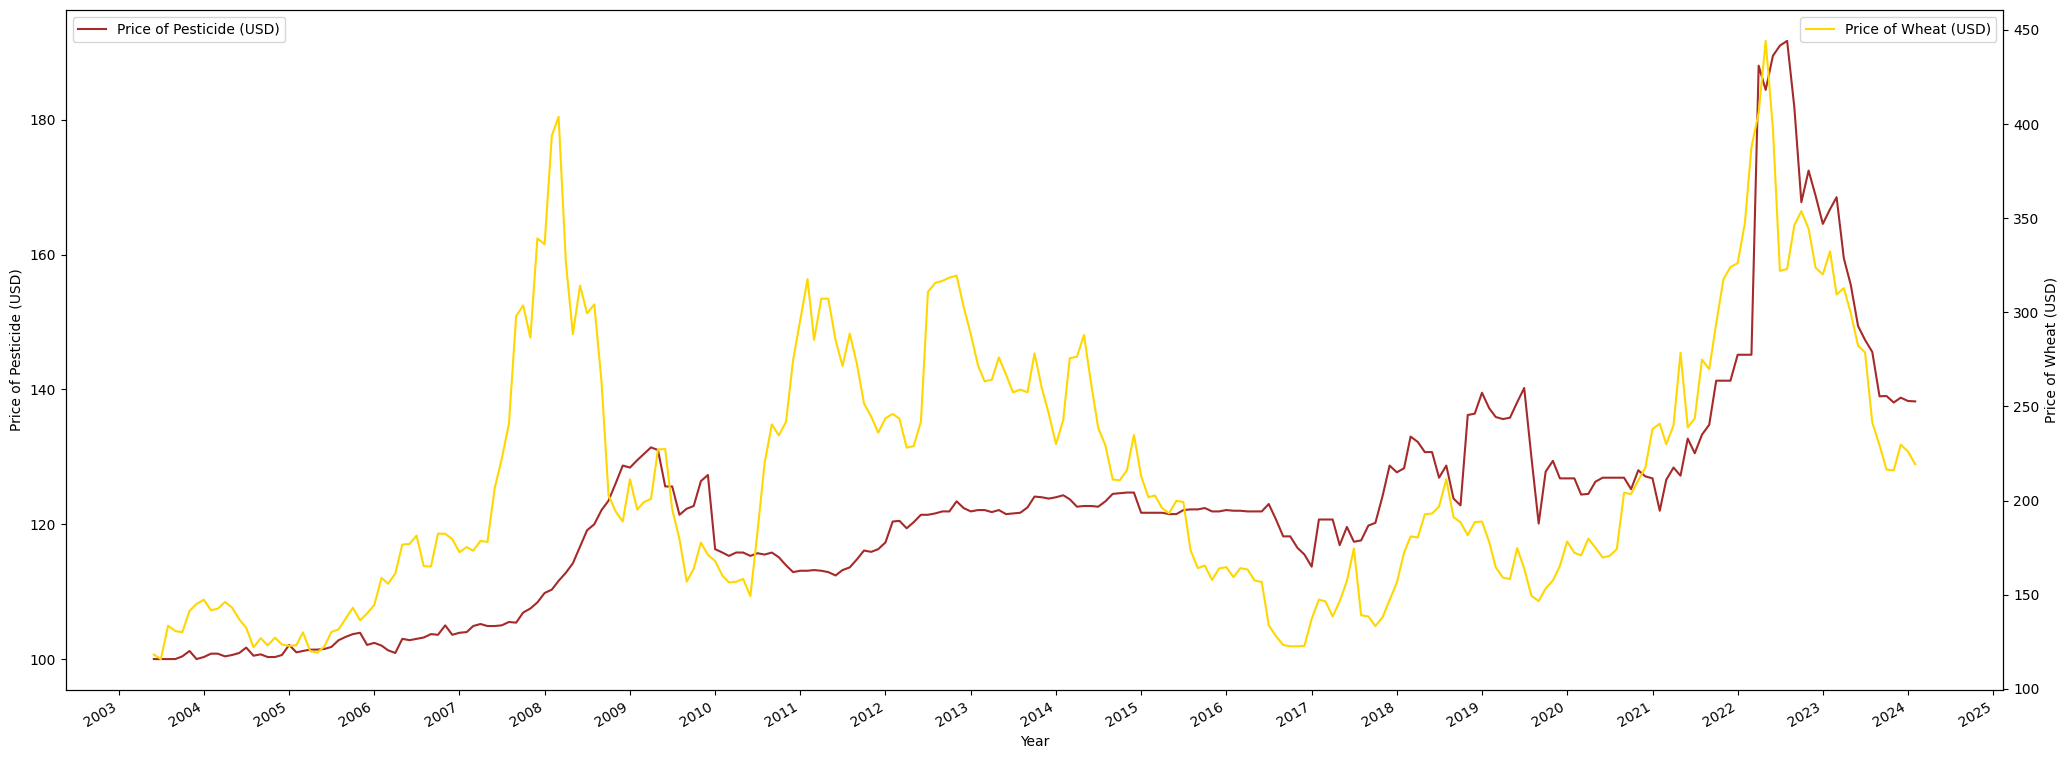

In [14]:
fig, ax1 = plt.subplots()

# use the 'Year' column as the x-axis values
x = merged_df6.index 
y1 = merged_df6['PEST']
y2 = merged_df6['WHEAT (USD)']

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, 'brown', label='Price of Pesticide (USD)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price of Pesticide (USD)', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, 'gold', label='Price of Wheat (USD)') # The data was collected by the International Monetary Fund
ax2.set_ylabel('Price of Wheat (USD)', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.autofmt_xdate()

plt.show()


We decided to time-lag our seed data to account for the fact that seed demand at period t is determined by growing seasons of period t+1. We lag by one year, as this gives the highest correlation between seed data and wheat data, which will be demonstrated in the next section. Therefore, we proceed to use our lagged seed data by for further calculations, visualizations and models.

In [15]:
price = pd.read_csv('PWHEAMTUSDM.csv')  # WHEAT
seeds_0 = pd.read_csv('seeds.csv')  # seeds

test = pd.merge(price, seeds_0)

lags = range(1, 13)  # just two lags for demonstration.

lagged_df = test.assign(**{f'seed_price (t-{lag})': test['WPU02550304'].shift(-lag) for lag in lags})
lagged_df = lagged_df.rename(columns={"WPU02550304": "seed_price (t)", "PWHEAMTUSDM": "wheat_price"})
lagged_df

,DATE,wheat_price,seed_price (t),seed_price (t-1),seed_price (t-2),seed_price (t-3),seed_price (t-4),seed_price (t-5),seed_price (t-6),seed_price (t-7),seed_price (t-8),seed_price (t-9),seed_price (t-10),seed_price (t-11),seed_price (t-12)
0,1991-06-01,120.151794,100.000,102.400,102.400,102.400,101.700,102.8,102.5,102.4,101.7,101.6,101.5,103.4,103.4
1,1991-07-01,118.209587,102.400,102.400,102.400,101.700,102.800,102.5,102.4,101.7,101.6,101.5,103.4,103.4,103.4
2,1991-08-01,125.326843,102.400,102.400,101.700,102.800,102.500,102.4,101.7,101.6,101.5,103.4,103.4,103.4,103.6
3,1991-09-01,135.372879,102.400,101.700,102.800,102.500,102.400,101.7,101.6,101.5,103.4,103.4,103.4,103.6,102.6
4,1991-10-01,146.887192,101.700,102.800,102.500,102.400,101.700,101.6,101.5,103.4,103.4,103.4,103.6,102.6,102.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,2023-10-01,216.463939,187.977,186.640,187.556,187.396,187.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,2023-11-01,216.000269,186.640,187.556,187.396,187.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,2023-12-01,229.633413,187.556,187.396,187.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,2024-01-01,226.078532,187.396,187.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
y_lag = lagged_df.wheat_price  # target
col_names = lagged_df.columns.values.tolist()
col_names.remove('DATE')
col_names.remove('wheat_price')
X_lag = lagged_df[col_names]

# run correlations
# for each in col_names, run a correlation with wheat prices

corr_lag = {}
for i, e in enumerate(X_lag):
    corr_lag['t+'+ str(i)] = lagged_df["wheat_price"].corr(lagged_df[e])
    print(f"When lagged by {i} months, the correlation between wheat prices and seed prices is {corr_lag['t+'+str(i)]}.")

When lagged by 0 months, the correlation between wheat prices and seed prices is 0.464270148262589.
When lagged by 1 months, the correlation between wheat prices and seed prices is 0.468595798387648.
When lagged by 2 months, the correlation between wheat prices and seed prices is 0.4722888942772165.
When lagged by 3 months, the correlation between wheat prices and seed prices is 0.476033458974513.
When lagged by 4 months, the correlation between wheat prices and seed prices is 0.4797094109177849.
When lagged by 5 months, the correlation between wheat prices and seed prices is 0.4838935305506062.
When lagged by 6 months, the correlation between wheat prices and seed prices is 0.4879708027006044.
When lagged by 7 months, the correlation between wheat prices and seed prices is 0.4902769864893913.
When lagged by 8 months, the correlation between wheat prices and seed prices is 0.49261460728651596.
When lagged by 9 months, the correlation between wheat prices and seed prices is 0.4953773858

In [17]:
lagged_df_12 = test.assign(**{f'seed_price (t-{12})': test['WPU02550304'].shift(-12)})
lagged_df_12 = lagged_df.rename(columns={"WPU02550304": "seed_price (t)", "PWHEAMTUSDM": "wheat_price"})
lagged_df_12 = lagged_df_12.set_index('DATE')
lagged_df_12.head()

,wheat_price,seed_price (t),seed_price (t-1),seed_price (t-2),seed_price (t-3),seed_price (t-4),seed_price (t-5),seed_price (t-6),seed_price (t-7),seed_price (t-8),seed_price (t-9),seed_price (t-10),seed_price (t-11),seed_price (t-12)
DATE,,,,,,,,,,,,,,
1991-06-01,120.151794,100.0,102.4,102.4,102.4,101.7,102.8,102.5,102.4,101.7,101.6,101.5,103.4,103.4
1991-07-01,118.209587,102.4,102.4,102.4,101.7,102.8,102.5,102.4,101.7,101.6,101.5,103.4,103.4,103.4
1991-08-01,125.326843,102.4,102.4,101.7,102.8,102.5,102.4,101.7,101.6,101.5,103.4,103.4,103.4,103.6
1991-09-01,135.372879,102.4,101.7,102.8,102.5,102.4,101.7,101.6,101.5,103.4,103.4,103.4,103.6,102.6
1991-10-01,146.887192,101.7,102.8,102.5,102.4,101.7,101.6,101.5,103.4,103.4,103.4,103.6,102.6,102.7


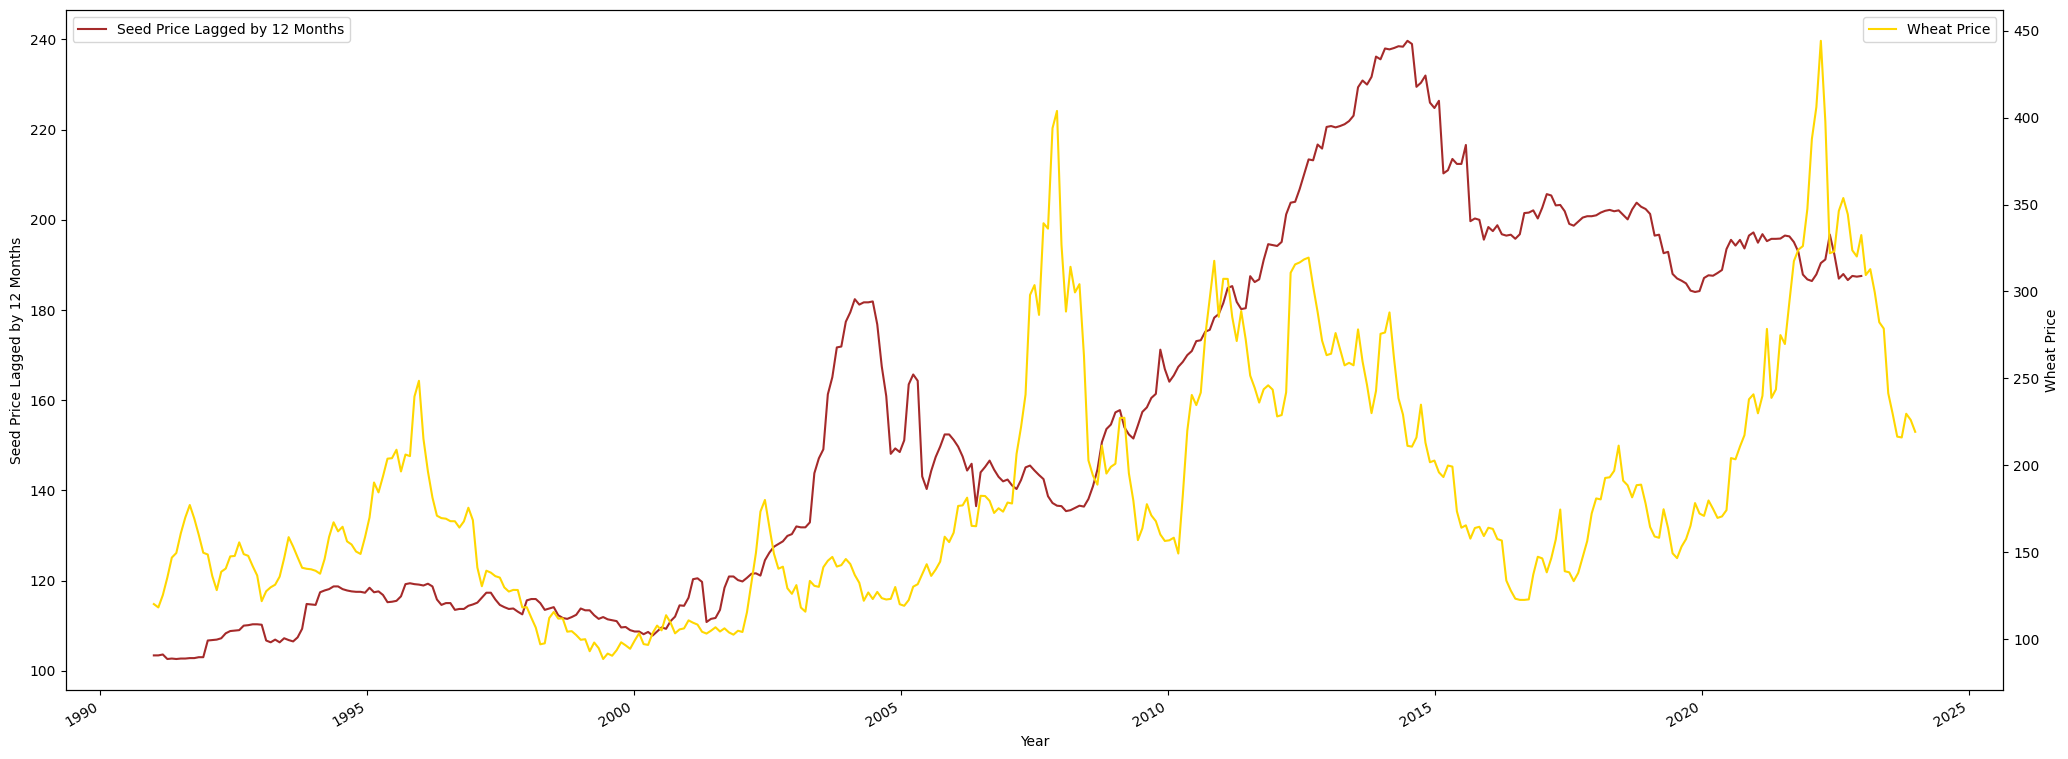

In [18]:
fig, ax1 = plt.subplots()

# use the 'Year' column as the x-axis values
x = np.linspace(1991, 2024, 393, endpoint=True)
y1 = lagged_df_12['seed_price (t-12)']
y2 = lagged_df_12['wheat_price']

ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, 'brown', label='Seed Price Lagged by 12 Months')
ax1.set_xlabel('Year')
ax1.set_ylabel('Seed Price Lagged by 12 Months', color='black')

ax2.plot(x, y2, 'gold', label='Wheat Price')
ax2.set_xlabel('Year')
ax2.set_ylabel('Wheat Price', color='black')

# display legend for y-axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#ax2.xaxis.set_major_locator(mdates.YearLocator())
#ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.autofmt_xdate()

plt.show()

In [19]:
pcpt_raw = pd.read_csv("weather data.csv")
wprod_raw = pd.read_csv("wheat production.csv")

# remove unecesary columns
wprod = wprod_raw.drop(wprod_raw.columns[list(range(6, 13))], axis = 1)

# remove rows 243 to 249 for production data
wprod = wprod.drop(list(range(243, 250)))

# remove 2024 data for weather data
pcpt_raw = pcpt_raw.drop(list(range(408, 410)))

# assign column names
wprod.columns = ['Year', 'Quarter', 'Beginning stocks', 'Production', 'Imports', 'Total supply']

# drop empty rows to get yearly production data
test = wprod.dropna(subset = ['Year','Production'])
test = test.reset_index(drop = True)
y1 = list(map(str, list(range(1975, 2024))))
y2 = list(map(str, list(range(1976, 2025))))
test.loc[:, 'Year'] = [u+'/'+i for u, i in zip(y1, y2)]

# remove years before 1990 (so first entry is now 1990/1991)
test_red = test.drop(list(range(0, 15))).reset_index(drop=True)

# now merge yearly precipitation with yearly production
year = list(range(1990, 2024))  # length is 34

pcpt_year = pcpt_raw.groupby(np.arange(len(pcpt_raw))//12).mean()

df = pd.DataFrame([year, test_red['Production'], pcpt_year['Value']]).T
df.columns = ['Year', 'Production', 'Precipitation']
df = df.set_index('Year')
df["Production"] = df["Production"].str.replace(",","").astype(float)
df["Precipitation"] = df["Precipitation"].astype(float)

df.head()

,Production,Precipitation
Year,,
1990,2730.0,2.680833
1991,1980.0,2.703333
1992,2467.0,2.605000
1993,2396.0,2.718333
1994,2321.0,2.551667


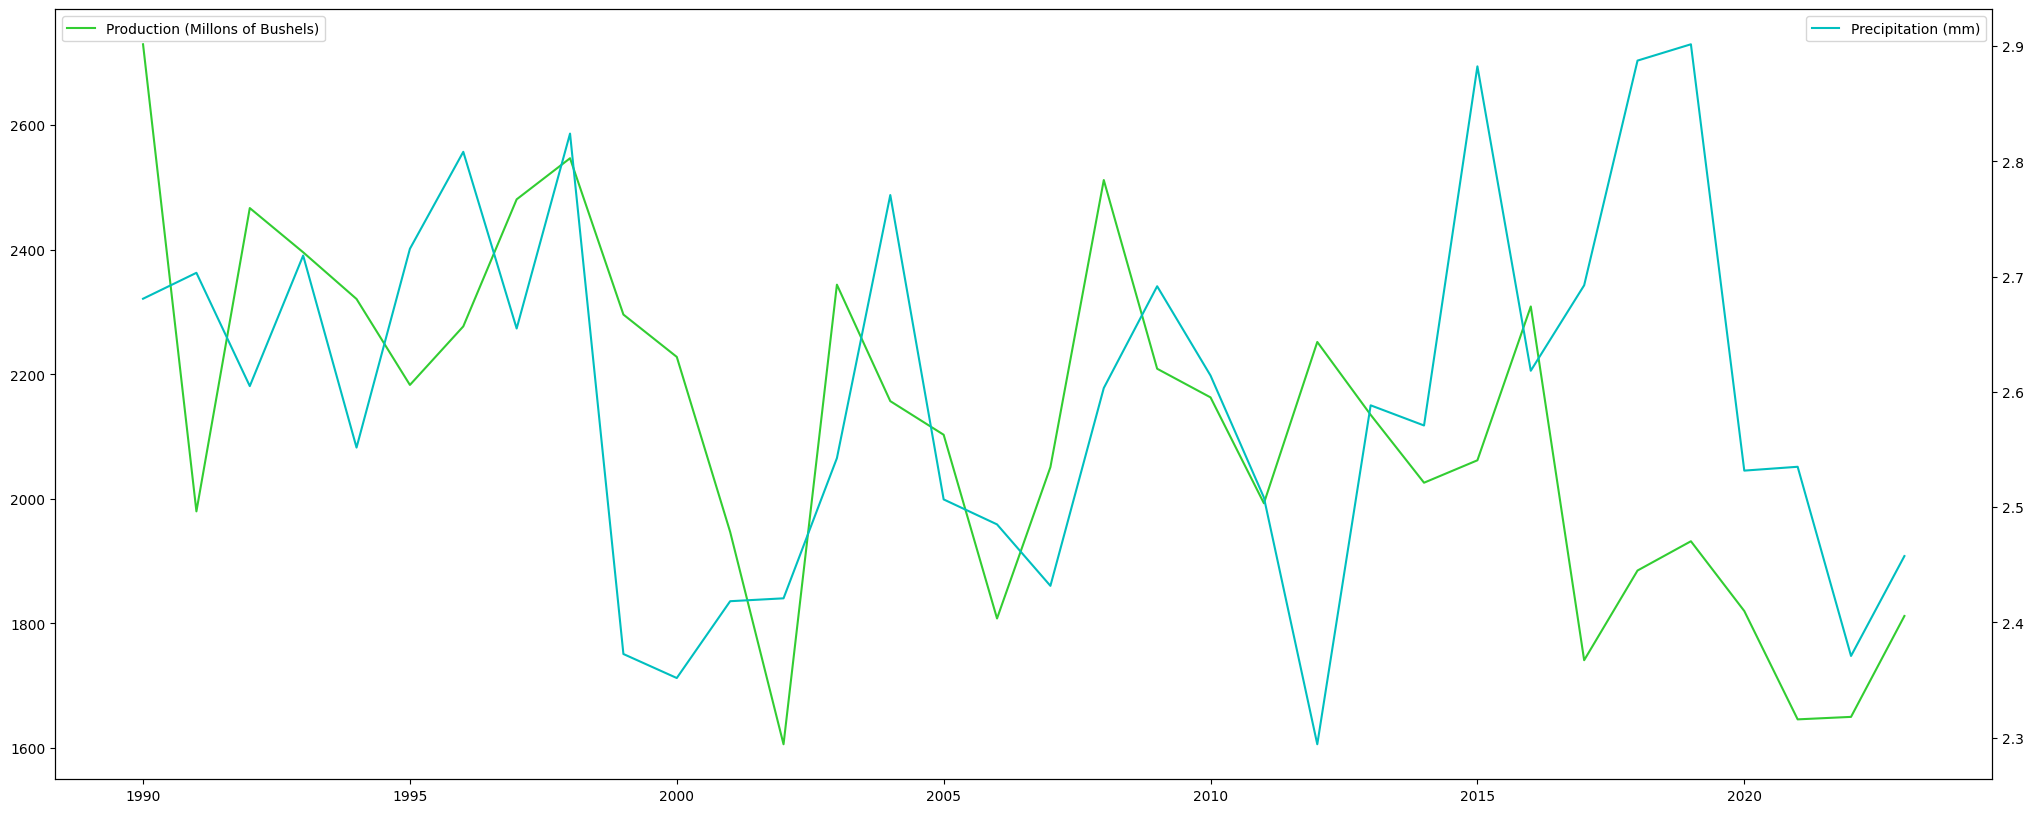

In [20]:
x = df.index
y1 = df['Production']
y2 = df['Precipitation']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='limegreen', label='Production (Millons of Bushels)')
ax2.plot(x, y2, color = 'c', label='Precipitation (mm)')  # the data was collected by the International Montetary Fund

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

## **Correlation Coefficients**

We proceed to calculate correlation coefficients between prices to pinpoint the most significant determinants of wheat prices.

In [21]:
Wheat_Oil_Corr = merged_df1["WTI"].corr(merged_df1["WHEAT (USD)"])
Fertilizer_Oil_Corr = merged_df2["WTI"].corr(merged_df2["FERT"])
AgMech_Oil_Corr = merged_df3["WTI"].corr(merged_df3["AGRI MACH"])
Fert_Wheat_Corr = merged_df4["FERT"].corr(merged_df4["WHEAT (USD)"])
AgMech_Wheat_Corr = merged_df5["AGRI MACH"].corr(merged_df5["WHEAT (USD)"])
Pesticide_Wheat_Corr = merged_df6["PEST"].corr(merged_df6["WHEAT (USD)"])
Seed_Wheat_Corr = lagged_df_12['seed_price (t-12)'].corr(lagged_df_12['wheat_price'])
WheatProd_Precip_Corr = df['Production'].corr(df['Precipitation'])

Wheat_Oil_Corr, Fertilizer_Oil_Corr, AgMech_Oil_Corr, Fert_Wheat_Corr, AgMech_Wheat_Corr, Pesticide_Wheat_Corr, Seed_Wheat_Corr, WheatProd_Precip_Corr

(0.7816870663891703,
 0.8361374552246091,
 0.6840589469388291,
 0.8338631173271533,
 0.6294197632618082,
 0.5474396510682035,
 0.5013909035767172,
 0.2212097443743315)

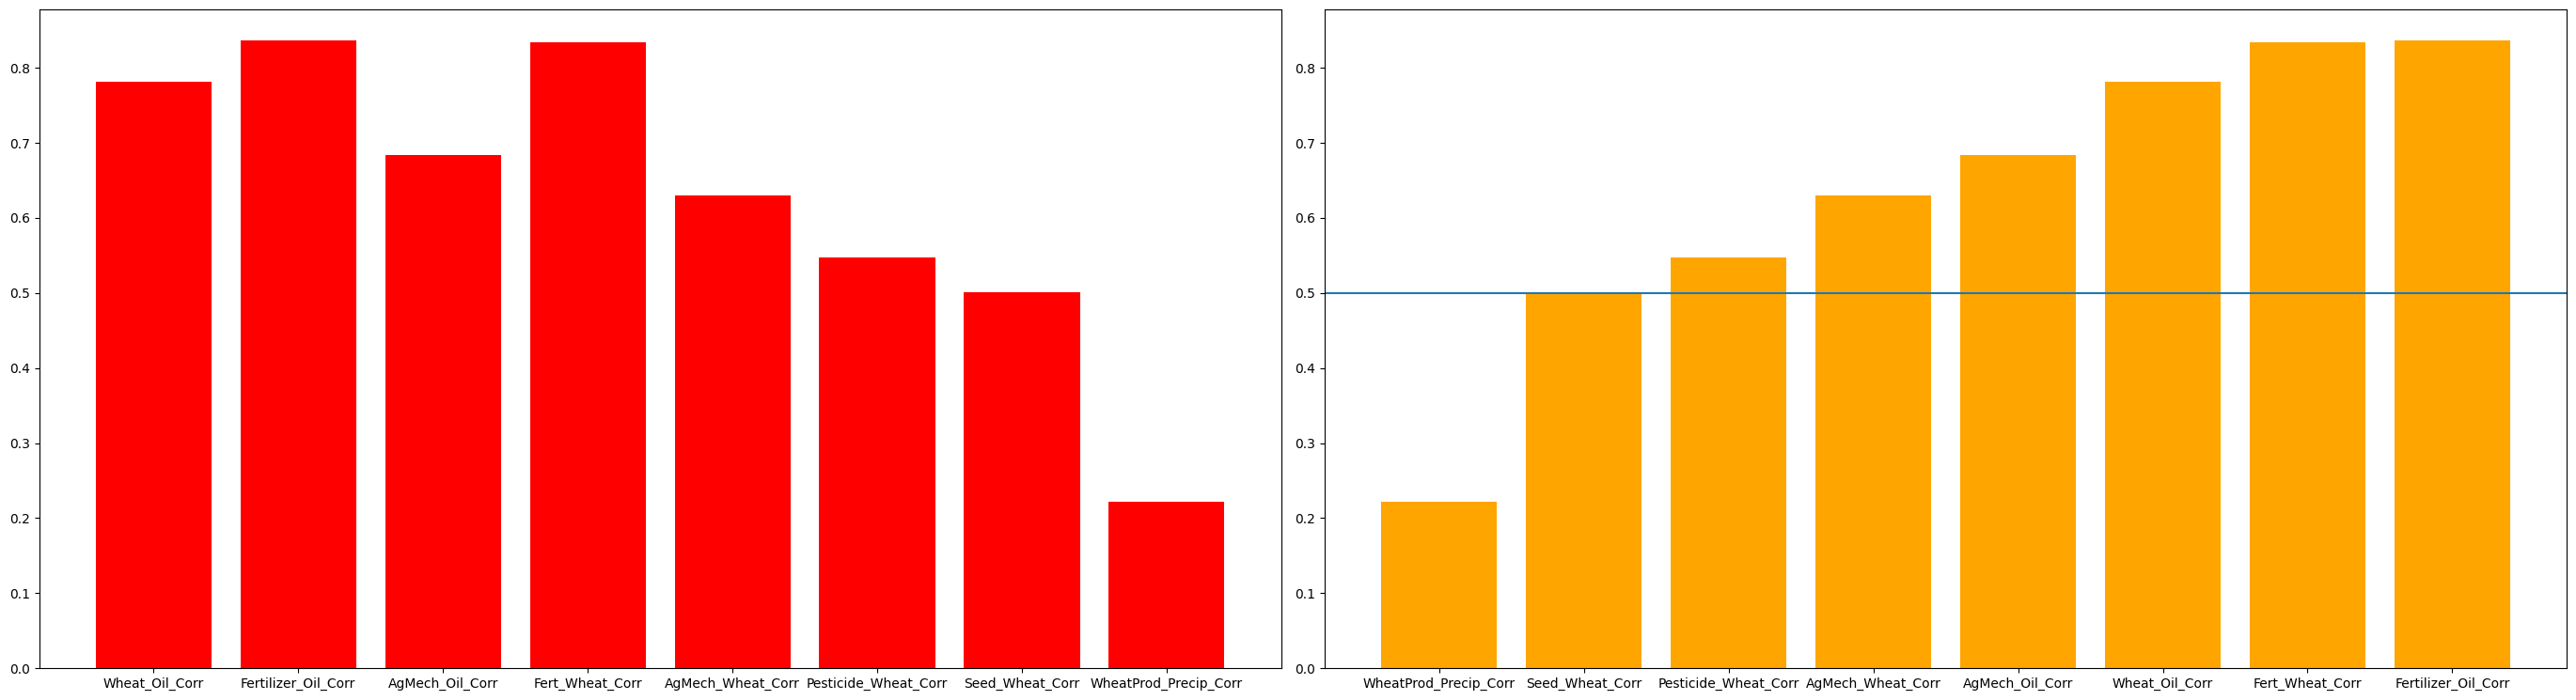

In [22]:
plt.rcParams["figure.figsize"] = [27.50, 7.55]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame(
   dict(
      names=["Wheat_Oil_Corr", "Fertilizer_Oil_Corr", "AgMech_Oil_Corr", "Fert_Wheat_Corr", "AgMech_Wheat_Corr", "Pesticide_Wheat_Corr", "Seed_Wheat_Corr", "WheatProd_Precip_Corr"],
      marks=[0.7816870663891703, 0.8361374552246091, 0.6840589469388291, 0.8338631173271533, 0.6294197632618082, 0.5474396510682035, 0.5013909035767172, 0.2212097443743315 ])
)

plt.subplot(121)
plt.bar('names', 'marks', data=df, color='red')

plt.subplot(122)
df_sorted = df.sort_values('marks')
plt.bar('names', 'marks', data=df_sorted, color='orange')

plt.axhline(y=0.5)

plt.show()

The most surprising result of the graphs was the weak correlations of pesticides, seeds and the impact of precipitations on wheat production. The pesticide correlation can be attributed to the fact that wheat represents a fraction of the total use of pesticides in modern agriculture. Seed prices do not necessarily accurately reflect current or future prices of wheat due to the international variety of wheat seed types, as the seeds are often regionally specific to accommodate for soil types. Finally, the impact of precipitation on wheat production, which included lagging by up to 3 years, actually made the correlation worse. While this data is  regionally specific to the United States, it suggests the strong impact of irrigation efforts in mitigating the variation of rainfall for wheat production in the United States. Due to this weak relationship, precipitation will be omitted from our lasso regression.

## **Lasso Regression**

We conclude the main analysis section with a lasso regression to determine the highest determinants of wheat prices. We also hope to produce an accurate model in predicting future pricing dynamics of wheat.

In [23]:
import pandas as pd

df1 = pd.read_csv('PCU325311325311.csv') # fert
df2 = pd.read_csv('WTISPLC.csv') # oil
df3 = pd.read_csv('WPUSI024011.csv') # agri mech
df4 = pd.read_csv('PWHEAMTUSDM.csv') # WHEAT
df5 = pd.read_csv('Pesticide2003.csv') # pesticide
df6 = pd.read_csv('farm_wage_data_99t22.csv') # wages
seeds = pd.read_csv('seeds.csv') # seeds
seeds_lag = seeds.assign(**{f'seed_price (t-{12})': seeds['WPU02550304'].shift(-12)})
df7 = seeds_lag.drop(columns={'WPU02550304'})

df_list = [df1, df2, df3, df4, df5, df7] # ignore df6 for now
merged_df = pd.DataFrame()
merged_df = df_list[0]

for df in df_list[1:]:
    merged_df = pd.merge(merged_df, df, on='DATE', how='inner')
    
merged_df.rename(columns={'PCU325311325311': 'Fertilizer', 'WTISPLC': 'West Texas Intermediate Brent Crude Oil',
                         'WPUSI024011': 'Agricultural Machinery', 'PWHEAMTUSDM': 'Wheat Prices',
                         'PCU3253203253201': 'Pesticide'}, inplace = True)
merged_df.columns

Index(['DATE', 'Fertilizer', 'West Texas Intermediate Brent Crude Oil',
       'Agricultural Machinery', 'Wheat Prices', 'Pesticide',
       'seed_price (t-12)'],
      dtype='object')

In [24]:
merged_df = merged_df.dropna(axis=0)
merged_df

,DATE,Fertilizer,West Texas Intermediate Brent Crude Oil,Agricultural Machinery,Wheat Prices,Pesticide,seed_price (t-12)
0,2003-06-01,177.600,30.72,166.200,118.157134,100.000,131.800
1,2003-07-01,173.800,30.76,166.500,115.775953,100.000,131.800
2,2003-08-01,175.800,31.59,168.000,133.484492,100.000,132.900
3,2003-09-01,178.400,28.29,168.100,130.649980,100.000,143.800
4,2003-10-01,180.700,30.33,168.100,130.056604,100.400,147.100
...,...,...,...,...,...,...,...
232,2022-10-01,657.695,87.55,329.336,353.712907,167.761,187.977
233,2022-11-01,676.643,84.37,329.027,344.329861,172.453,186.640
234,2022-12-01,653.888,76.44,329.014,323.654838,168.727,187.556
235,2023-01-01,605.750,78.12,328.625,320.097045,164.550,187.396


In [25]:
y = merged_df['Wheat Prices'] # target
y

0      118.157134
1      115.775953
2      133.484492
3      130.649980
4      130.056604
          ...    
232    353.712907
233    344.329861
234    323.654838
235    320.097045
236    332.412023
Name: Wheat Prices, Length: 237, dtype: float64

In [26]:
features = ['Fertilizer', 'West Texas Intermediate Brent Crude Oil', 'Agricultural Machinery', 'Pesticide',
           'seed_price (t-12)']
#features = ['WTISPLC']
X = merged_df[features]
X.describe()

,Fertilizer,West Texas Intermediate Brent Crude Oil,Agricultural Machinery,Pesticide,seed_price (t-12)
count,237.000000,237.000000,237.000000,237.000000,237.000000
mean,341.144502,68.607300,224.581907,121.245772,183.441367
std,114.206031,23.375202,35.113883,16.830574,28.000784
min,173.800000,16.550000,166.200000,100.000000,131.800000
25%,270.600000,49.820000,199.500000,112.800000,157.800000
50%,310.100000,64.970000,224.100000,121.700000,187.700000
75%,389.900000,87.550000,238.500000,126.800000,201.200000
max,774.068000,133.930000,329.336000,191.692000,239.700000


In [27]:
X.head()

,Fertilizer,West Texas Intermediate Brent Crude Oil,Agricultural Machinery,Pesticide,seed_price (t-12)
0,177.6,30.72,166.2,100.0,131.8
1,173.8,30.76,166.5,100.0,131.8
2,175.8,31.59,168.0,100.0,132.9
3,178.4,28.29,168.1,100.0,143.8
4,180.7,30.33,168.1,100.4,147.1


[ 0.34822085  1.28240286  0.30558094 -0.45839942 -0.31031972]
     Fertilizer  West Texas Intermediate Brent Crude Oil  \
0       177.600                                    30.72   
1       173.800                                    30.76   
2       175.800                                    31.59   
3       178.400                                    28.29   
4       180.700                                    30.33   
..          ...                                      ...   
232     657.695                                    87.55   
233     676.643                                    84.37   
234     653.888                                    76.44   
235     605.750                                    78.12   
236     543.660                                    76.83   

     Agricultural Machinery  Pesticide  seed_price (t-12)  
0                   166.200    100.000            131.800  
1                   166.500    100.000            131.800  
2                   168.000    100.00

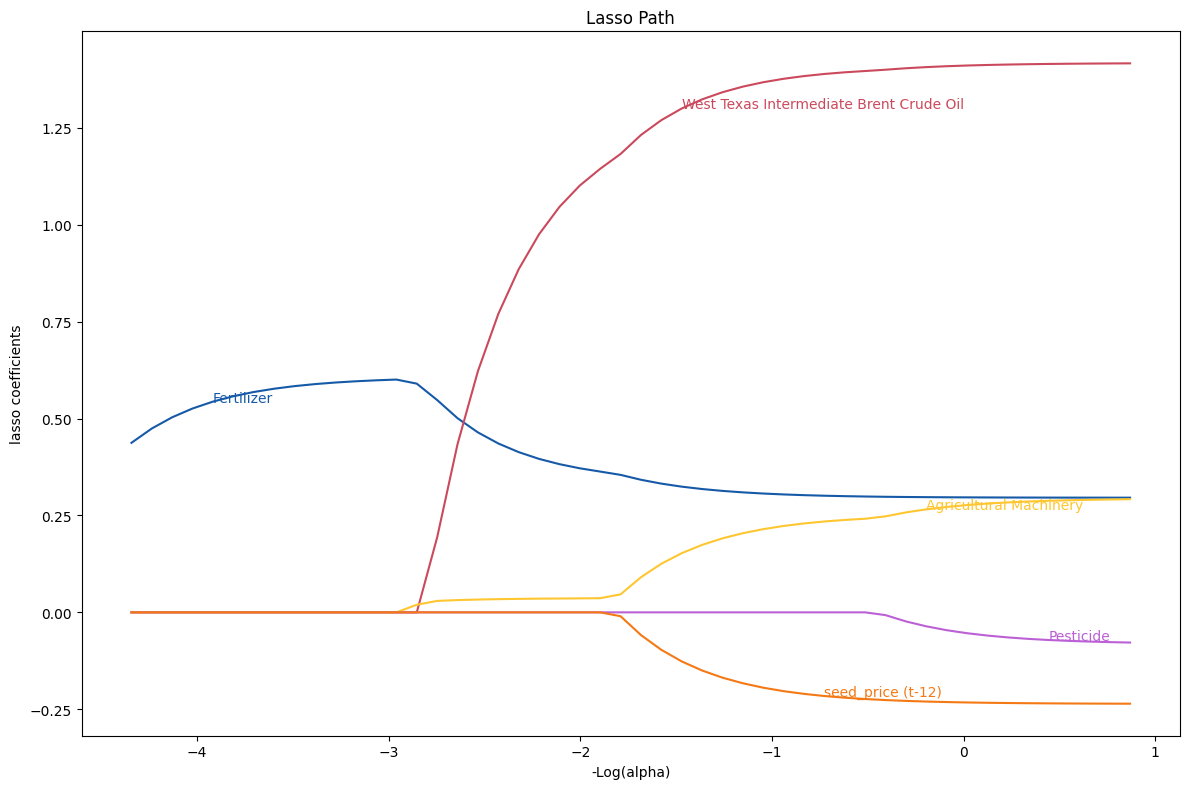

In [28]:
lasso_model = linear_model.Lasso() #identifying the variables that have the biggest impact on MSE, and therefore informing us which variables to regress if we're not using them all
lasso_model.fit(X, y)
lasso_model.coef_

from itertools import cycle
alphas = np.exp(np.linspace(10, -2, 50))
alphas, coefs_lasso, _ = linear_model.lasso_path(X, y, alphas=alphas, max_iter=10000)

colors = ['#165aa7', '#cb495c', '#fec630', '#bb60d5', '#f47915']

# plotting
fig, ax = plt.subplots(figsize=(12, 8))
color_cycle = cycle(colors)
log_alphas = -np.log10(alphas)
for coef_l, c, name in zip(coefs_lasso, color_cycle, list(X)):
   ax.plot(log_alphas, coef_l, c=c)
   ax.set_xlabel('-Log(alpha)')
   ax.set_ylabel('lasso coefficients')
   ax.set_title('Lasso Path')
   ax.axis('tight')
   maxabs = np.max(np.abs(coef_l))
   i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
   xnote = log_alphas[i]
   ynote = coef_l[i]
   ax.annotate(name, (xnote, ynote), color=c)

print(lasso_model.coef_)
print(X)

The strength of the West Texas Intermediate Brent Crude Oil in the lasso regression is incredibly high, indicating it is a crucial determinant in wheat prices in the long run. However, when the alpha is increased, the precipitous decline in Oil becomes quickly surpassed by the highest value in the lasso coefficient at any alpha at -3 or lower. At this point, fertilizer emerges as the strongest lasso coefficient across the model, maintaining its strength throughout. The negative correlation with seeds persists, despite lagging the data up to 12 months. Pesticide proved to be weaker than expected and the relatively low correlation with agricultural machinery prices is only notable due to its relative strength across the regression, declining to zero shortly after Oil. With an MSE of 5.52, we feel confident in the predictive power of the model while ensuring that it is not overfitted. 

# **Conclusion**

Oil is a major determinant of wheat prices in the long run. This means that the concerns around cheap and accessible energy caused by the most recent energy crisis in 2022 is valid when considering the impact on global wheat prices.

Nitrogenous Fertilizers emerged as the most important variable in the data set, the only value which maintained its strength throughout the lasso regression. This is unsurprising as on a large scale, commercial farms are dependent on fertilizers to compensate for a lack of crop rotation and soil degradation. Additionally the correlation between oil prices and fertilizers was very high. 

Precipitation proved to be one of the weakest correlations in the model, which we attributed to widespread use of irrigation across the United States, where the data for production and rainfall was correlated together. Even after lagging the data for 3 years, we found a weaker correlation than before, which further suggests that major droughts are being combatted with effective water management and irrigation techniques.

This group concludes that in the long run, the price of Fertilizer and Oil are the best indicators to predict the price of wheat.

Additionally, a simple machine learning model using the Random Forest Regressor was developed, which will be included in the Addendum below.


# **ADDENDUM: Predicting The Trend of the Price of Wheat**

This section of the project tries to predict the trend of the price of wheat in the next five years through the `Random Forest` machine learning model.

First of all, let's define what the `Random Forest` regressor model actually is. The `Random Forest` model can be considered as an upgrade on the `Decision Tree` model and is essentially a series of decision trees. A `Decision Tree` regressor algorithm makes predictions using a structured binary tree. The model operates by recursively dividing the data into subsets according to the most important attribute at each tree node.

However, the `Decision Tree` is prone to underfitting, where predictions perform excessively poor, and overfitting, where predictions perform excessively well, *if* there exists no bounds on the tree's depth. This is where the `Random Forest` model comes in. By averaging the predictions of each component tree, the `Random Forest` generates a prediction. Compared to a single decision tree, it typically has far higher predictive accuracy and performs well with default values.

With this in mind, let us apply the theory to our wheat price dataset.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # to be used to optimize tree depth
from sklearn.metrics import mean_absolute_error  # to compute the mean absolute error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
df1 = pd.read_csv('PCU325311325311.csv')  # fertilizer
df2 = pd.read_csv('WTISPLC.csv')  # crude oil
df3 = pd.read_csv('WPUSI024011.csv')  # agricultural machinery
df4 = pd.read_csv('PWHEAMTUSDM.csv')  # WHEAT
df5 = pd.read_csv('Pesticide2003.csv')  # pesticide
df6 = pd.read_csv('seeds.csv')  # seeds

df_list = [df1, df2, df3, df4, df5, df6] 
merged_df = pd.DataFrame()
merged_df = df_list[0]

for df in df_list[1:]:  # merge the dataframes on the date column and find biggest overlap
    merged_df = pd.merge(merged_df, df, on='DATE', how='inner')
    
merged_df = merged_df.dropna(axis=0)  # drop any potential NaN values
    
merged_df.columns

Index(['DATE', 'PCU325311325311', 'WTISPLC', 'WPUSI024011', 'PWHEAMTUSDM',
       'PCU3253203253201', 'WPU02550304'],
      dtype='object')

In machine learning, `y` is conventionally defined as the target value, whilst `X` is defined as the "features", or the training data. In this case, `y` is wheat prices and `X` is rest of the accounted variables exhbited *apart from* the target.

In [31]:
y = merged_df.PWHEAMTUSDM  # target

features = ['PCU325311325311', 'WTISPLC', 'WPUSI024011', 'PCU3253203253201', 'WPU02550304']

X = merged_df[features]

y.head(), X.head()

(0    118.157134
 1    115.775953
 2    133.484492
 3    130.649980
 4    130.056604
 Name: PWHEAMTUSDM, dtype: float64,
    PCU325311325311  WTISPLC  WPUSI024011  PCU3253203253201  WPU02550304
 0            177.6    30.72        166.2             100.0        120.6
 1            173.8    30.76        166.5             100.0        121.5
 2            175.8    31.59        168.0             100.0        121.6
 3            178.4    28.29        168.1             100.0        121.1
 4            180.7    30.33        168.1             100.4        124.5)

Now, before running the `Random Forest` regressor, we must recall that a random forest consists of decision trees. This means it is in our best interest optimize and control the number of tree nodes to ensure the `mean absolute error`, more commonly known as `mae`, is minimal. The `mae` is the mean variance between any significant values in a dataset and its predicted values in the same dataset.

$$
\text{mae} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
- $n$ is the number of data points.
- $y_{i}$ represents the actual values.
- $\hat{y}_i$ represents the predicted values.

In [32]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

def mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    predsVal = model.predict(val_X)
    mae = mean_absolute_error(val_y, predsVal)
    return(mae)

for maxLeafNodes in [i for i in range(5, 100, 5)]:  # arbitrary range with arbitrary step
    myMAE = mae(maxLeafNodes, train_X, val_X, train_y, val_y)
    print("Maximum leaf nodes: %d  \t\t MAE:  %f" %(maxLeafNodes, myMAE))

Maximum leaf nodes: 5  		 MAE:  28.021280
Maximum leaf nodes: 10  		 MAE:  23.516511
Maximum leaf nodes: 15  		 MAE:  21.407904
Maximum leaf nodes: 20  		 MAE:  21.059343
Maximum leaf nodes: 25  		 MAE:  20.015448
Maximum leaf nodes: 30  		 MAE:  20.823434
Maximum leaf nodes: 35  		 MAE:  22.145005
Maximum leaf nodes: 40  		 MAE:  20.538357
Maximum leaf nodes: 45  		 MAE:  20.236992
Maximum leaf nodes: 50  		 MAE:  19.783986
Maximum leaf nodes: 55  		 MAE:  20.399856
Maximum leaf nodes: 60  		 MAE:  20.040448
Maximum leaf nodes: 65  		 MAE:  20.091223
Maximum leaf nodes: 70  		 MAE:  19.916765
Maximum leaf nodes: 75  		 MAE:  19.846544
Maximum leaf nodes: 80  		 MAE:  19.892061
Maximum leaf nodes: 85  		 MAE:  20.135384
Maximum leaf nodes: 90  		 MAE:  20.116455
Maximum leaf nodes: 95  		 MAE:  19.934180


It can be seen that the maximum number of leaf nodes that yields the least `mae` is `50`. Thus, this is the number we shall use to parse into the `Random Forest` regressor.

In [33]:
bestTreeSize = 50

forestModel = RandomForestRegressor(random_state=1, max_leaf_nodes=bestTreeSize)
forestModel.fit(train_X, train_y)
wheatPredictions = forestModel.predict(val_X)

print(mean_absolute_error(val_y, wheatPredictions))

wheatPredictions

15.265313035013865


array([226.0551411 , 149.38400645, 193.34329415, 169.61499281,
       194.60195641, 205.030027  , 182.97882485, 138.91471611,
       254.48877724, 231.77208219, 294.8747441 , 168.85776009,
       201.56327408, 170.72712442, 142.50454427, 168.56282051,
       338.71527613, 272.89165702, 343.65565893, 283.79979447,
       168.68128052, 240.52735284, 141.03702303, 257.65873704,
       172.84364076, 183.78371617, 179.20828766, 299.84087502,
       300.99901937, 291.23099129, 284.27033762, 139.36115797,
       167.02887437, 286.51957068, 253.23517741, 135.25138239,
       125.87659617, 254.64037272, 138.69970016, 158.05258104,
       263.3007092 , 410.69276945, 283.97688186, 157.8322262 ,
       209.26343157, 186.05641414, 312.23377776, 256.44955948,
       201.19514039, 341.86227781, 286.31786826, 127.2015398 ,
       174.67387697, 127.41905477, 208.65684035, 138.93054271,
       407.93793371, 197.21257077, 189.05481136, 138.03765361,
       239.14492759, 247.94441134, 316.69485585])

The array displayed above contains the predicted wehat prices for the next five years and three months, given the provided training data. Even though this is an overall net postive  indicator of the future trend of wheat, it should be kept in mind that there are also limitations associated with the model. 

**Benefits**
- Qualitative trend (i.e. the trace of the graph) matches well with historical data
- The current price of wheat as of April 2024 is in full accord with the first prediction of the model
- Accurate in the short-to-medium run 

**Limitations**:
- Cannot forsee shock events such as COVID or the war between Russia and Ukraine
- As a result, this model is less accurate in the long run.